In [1]:
# Import the modules
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Select which features/columns to include in ML Model feature set
# Select which "derived" features to include in ML Model feature set

# Select crypto assets interested in evaluating
INCLUDE_BTEC = True
INCLUDE_ETH = True
INCLUDE_ADA = False

# Select the orderbook timeframe's interested in
INCLUDE_5MIN_DATA = True
INCLUDE_1MIN_DATA = True
INCLUDE_1SEC_DATA = False

NUM_ORDER_BOOK_LEVELS = 15

In [3]:
TURN_ON_PRINT_DEBUG = True

In [4]:
# Setting these options will allow for reviewing more of the DataFrames
pd.set_option('display.max_columns', 200)

### Import the DERIVED Crytpo Order Book Data

In [5]:
# dictionary to store crypto dataframes {BTEC, ETH, ADA}, {5min, 1min, 1sec}
crypto_ob_df_dict = {} 

# Based on the selection critero, read the csv crypto order book csv files into the dictrionary
if (INCLUDE_5MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_5min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1SEC_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )    

In [6]:
# Debug data checkpoint

if (TURN_ON_PRINT_DEBUG):
    display(crypto_ob_df_dict.keys())
    
    for crypto_ob_key in crypto_ob_df_dict: 
        print(f"\nDebug {crypto_ob_key} derived dataframe:")
        display(crypto_ob_df_dict[crypto_ob_key].shape)
        display(crypto_ob_df_dict[crypto_ob_key].head(n=5))

dict_keys(['crypto_BTC_5min', 'crypto_ETH_5min', 'crypto_BTC_1min', 'crypto_ETH_1min'])


Debug crypto_BTC_5min derived dataframe:


(3367, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity


Debug crypto_ETH_5min derived dataframe:


(3365, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity


Debug crypto_BTC_1min derived dataframe:


(17113, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity


Debug crypto_ETH_1min derived dataframe:


(17110, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity

In [7]:
# Print confusion matrix
def confusion_matrix_sklearn(y_test, y_pred, plt_title):
    """
    To plot the confusion_matrix with percentages
    prediction:  predicted values
    original:    original values
    """
    cm = confusion_matrix(y_test, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(plt_title)

### Run the machine learning algorithms in a loop for all the crypto assets and timeframes

In [8]:
logreg_pred_dict = {}
svm_pred_dict = {}
dectree_pred_dict = {}
rndfor_pred_dict = {}
knn_pred_dict = {}

logreg_pred_scaled_dict = {}
svm_pred_scaled_dict = {}
dectree_pred_scaled_dict = {}
rndfor_pred_scaled_dict = {}
knn_pred_scaled_dict = {}

logreg_class_rpt_dict = {}
svm_class_rpt_dict = {}
dectree_class_rpt_dict = {}
rndfor_class_rpt_dict = {}
knn_class_rpt_dict = {}
    
logreg_class_rpt_scaled_dict = {}
svm_class_rpt_scaled_dict = {}
dectree_class_rpt_scaled_dict = {}
rndfor_class_rpt_scaled_dict = {}
knn_class_rpt_scaled_dict = {}

In [9]:
for crypto_ob_key in crypto_ob_df_dict:

    # Select which crypto order book data file to analyze
    crypto_sel_df = crypto_ob_df_dict[crypto_ob_key]
    print(f"\n\n\n\nEvaluating Crypto DataFrame: {crypto_ob_key}")

    # Find the location of the "midpoint" column, and initialize the "Signal" to 0 (to be placed next the midpotint column entry)
    midpoint_column_index = crypto_ob_df_dict[crypto_ob_key].columns.get_loc("midpoint")
    if 'Signal' in crypto_sel_df.columns:
        crypto_sel_df["Signal"] = 0.0
    else:
        crypto_sel_df.insert(midpoint_column_index+1, "Signal", 0.0)        
    
    # If the buys_sells_imbalance increases, set Signal to +1, else if it decreases, set to 0
    crypto_sel_df.loc[(crypto_sel_df['buys_sells_imbalance'].shift(-1) >= crypto_sel_df['buys_sells_imbalance']), 'Signal'] = 1
    crypto_sel_df.loc[(crypto_sel_df['buys_sells_imbalance'].shift(-1) < crypto_sel_df['buys_sells_imbalance']), 'Signal'] = 0
    
    # drop the last row (don't know if the next row midpoint went up or down)
    crypto_sel_df.drop(index=crypto_sel_df.index[-1],axis=0,inplace=True)
        
    # Separate the data into labels and features
    
    # Separate the y variable, the labels
    y_srs = crypto_sel_df['Signal']
    
    # Separate the X variable, the features
    X_df = crypto_sel_df.drop(columns='Signal')

    x = crypto_sel_df.isna().sum()
    if (x.sum() > 0):
        #na_df = crypto_sel_df[crypto_sel_df.isna()]
        #display(crypto_sel_df)
        nan_in_col  = crypto_sel_df.isna()
        display(nan_in_col)
        
    # Split the data using 
    train_index = int(X_df.shape[0] * 0.75) - 1
    X_train_df = X_df.iloc[:train_index]
    y_train_srs = y_srs.iloc[:train_index]
    X_test_df = X_df.iloc[train_index:]
    y_test_srs = y_srs.iloc[train_index:]
    #X_train_df, X_test_df, y_train_srs, y_test_srs = train_test_split(X_df, y_srs, random_state=1)
        
    # Instantiate the Logistic Regression model
    # Assign a random_state parameter of 1 to the model
    logreg_model = LogisticRegression(random_state=1)
    
    # Fit the model using training data
    logreg_model.fit(X_train_df, y_train_srs)
    
    #### svm_model = SVC(kernel='linear')
    #### 
    #### # Fit the data
    #### svm_model.fit(X_train_df, y_train_srs)
    
    # Creating the decision tree classifier instance
    dectree_model = tree.DecisionTreeClassifier(random_state=1)
    
    # Fitting the model
    dectree_model = dectree_model.fit(X_train_df, y_train_srs)
    
    # Create a random forest classifier
    rndfor_model = RandomForestClassifier(n_estimators=100, random_state=1)
    
    # Fitting the model
    rndfor_model = rndfor_model.fit(X_train_df, y_train_srs)
    
    # Instantiate the model with k = 3 neighbors
    knn_model = KNeighborsClassifier(n_neighbors=3)
    
    # Train the model
    knn_model.fit(X_train_df, y_train_srs)
    
    # Make a prediction using the testing data on the logistics Regression model
    logreg_y_pred_npa = logreg_model.predict(X_test_df)
    
    #### # Make a prediction using the testing data on the Support Vector Matrix model
    #### svm_y_pred_npa = svm_model.predict(X_test_df)
    
    # Make a prediction using the testing data on the Decision Tree model
    dectree_y_pred_npa = dectree_model.predict(X_test_df)
    
    # Make a prediction using the testing data on the Random Forest model
    rndfor_y_pred_npa = rndfor_model.predict(X_test_df)
    
    # Make a prediction using the testing data on the KNN model
    knn_y_pred_npa = knn_model.predict(X_test_df)
    
    print("\n\n")
    print(f"Balanced Accuracy Scores {crypto_ob_key}:")
    print("------------------------------------------")
    
    # Print the balanced_accuracy score of the Logistic Regression Model
    print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_npa))
    
    #### # Print the balanced_accuracy score of the Support Vector Matrix Model
    #### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_npa))
    
    # Print the balanced_accuracy score of the Decision Tree Model
    print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_npa))
    
    # Print the balanced_accuracy score of the Random Forest Model
    print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_npa))
    
    # Print the balanced_accuracy score of the KNN Model
    print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_npa))
                
    #### confusion_matrix_sklearn(y_test_srs, logreg_y_pred_npa, "Logistic Regression")
    #### #### confusion_matrix_sklearn(y_test_srs, svm_y_pred_npa, "SVM")
    #### confusion_matrix_sklearn(y_test_srs, dectree_y_pred_npa, "Decision Tree")
    #### confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_npa, "Random Forest")
    #### confusion_matrix_sklearn(y_test_srs, knn_y_pred_npa, "KNN")

    print("\n\n")
    print(f"Classification Report {crypto_ob_key}:")
    print("---------------------------------------")
    
    # Print the classification report for the Logistics Regression model
    logreg_class_rpt = classification_report(y_test_srs, logreg_y_pred_npa)
    
    #### # Print the classification report for the SVM model
    #### svm_class_rpt = classification_report(y_test_srs, svm_y_pred_npa)
    
    # Print the classification report for the Decision Tree model
    dectree_class_rpt = classification_report(y_test_srs, dectree_y_pred_npa)
    
    # Print the classification report for the Random Forest model
    rndfor_class_rpt = classification_report(y_test_srs, rndfor_y_pred_npa)
    
    # Print the classification report for the KNN model
    knn_class_rpt = classification_report(y_test_srs, knn_y_pred_npa)
    
    print("Logistic Regression Classification Report:\n", logreg_class_rpt)
    ####print("SVM Classification Report:\n", svm_class_rpt)
    print("Decision Tree Classification Report:\n", dectree_class_rpt)
    print("Random Forest Classification Report:\n", rndfor_class_rpt)
    print("KNN Classification Report:\n", knn_class_rpt)

    logreg_pred_dict[crypto_ob_key] = logreg_y_pred_npa
    dectree_pred_dict[crypto_ob_key] = dectree_y_pred_npa
    rndfor_pred_dict[crypto_ob_key] = rndfor_y_pred_npa
    knn_pred_dict[crypto_ob_key] = knn_y_pred_npa

    # (Re-)Calculate classificaiton report to output to a dictionary format
    logreg_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, logreg_y_pred_npa, output_dict = True)
    #### svm_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, svm_y_pred_npa, output_dict = True)
    dectree_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, dectree_y_pred_npa, output_dict = True)
    rndfor_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, rndfor_y_pred_npa, output_dict = True)
    knn_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, knn_y_pred_npa, output_dict = True)

    # Scale the data
    scaler = StandardScaler()
    X_scaler = scaler.fit(X_train_df)
    X_train_scaled_npa = X_scaler.transform(X_train_df)
    X_test_scaled_npa = X_scaler.transform(X_test_df)
    
    # Instantiate the Logistic Regression model
    # Assign a random_state parameter of 1 to the model
    logreg_model = LogisticRegression(random_state=1)
    
    # Fit the model using training data
    logreg_model.fit(X_train_scaled_npa, y_train_srs)
    
    #### svm_model = SVC(kernel='linear')
    #### 
    #### # Fit the data
    #### svm_model.fit(X_train_scaled_npa, y_train_srs)
    
    # Creating the decision tree classifier instance
    dectree_model = tree.DecisionTreeClassifier(random_state=1)
    
    # Fitting the model
    dectree_model = dectree_model.fit(X_train_scaled_npa, y_train_srs)
    
    # Create a random forest classifier
    rndfor_model = RandomForestClassifier(n_estimators=100, random_state=1)
    
    # Fitting the model
    rndfor_model = rndfor_model.fit(X_train_scaled_npa, y_train_srs)
    
    # Instantiate the model with k = 3 neighbors
    knn_model = KNeighborsClassifier(n_neighbors=3)
    
    # Train the model
    knn_model.fit(X_train_scaled_npa, y_train_srs)
    
    # Make a prediction using the testing data on the logistics Regression model
    logreg_y_pred_npa = logreg_model.predict(X_test_scaled_npa)
    
    #### # Make a prediction using the testing data on the Support Vector Matrix model
    #### svm_y_pred_npa = svm_model.predict(X_test_scaled_npa)
    
    # Make a prediction using the testing data on the Decision Tree model
    dectree_y_pred_npa = dectree_model.predict(X_test_scaled_npa)
    
    # Make a prediction using the testing data on the Random Forest model
    rndfor_y_pred_npa = rndfor_model.predict(X_test_scaled_npa)
    
    # Make a prediction using the testing data on the KNN model
    knn_y_pred_npa = knn_model.predict(X_test_scaled_npa)
    
    print("\n\n")
    print(f"Balanced Accuracy Scores w/ Scaling {crypto_ob_key}:")
    print("-----------------------------------------------------")
    
    # Print the balanced_accuracy score of the Logistic Regression Model
    print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_npa))
    
    #### # Print the balanced_accuracy score of the Support Vector Matrix Model
    #### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_npa))
    
    # Print the balanced_accuracy score of the Decision Tree Model
    print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_npa))
    
    # Print the balanced_accuracy score of the Random Forest Model
    print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_npa))
    
    # Print the balanced_accuracy score of the KNN Model
    print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_npa))
                
    #### confusion_matrix_sklearn(y_test_srs, logreg_y_pred_npa, "Logistic Regression")
    #### #### confusion_matrix_sklearn(y_test_srs, svm_y_pred_npa, "SVM")
    #### confusion_matrix_sklearn(y_test_srs, dectree_y_pred_npa, "Decision Tree")
    #### confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_npa, "Random Forest")
    #### confusion_matrix_sklearn(y_test_srs, knn_y_pred_npa, "KNN")
    
    print("\n\n")
    print(f"Classification Report w/ Scaling {crypto_ob_key}:")
    print("---------------------------------------")
    
    # Print the classification report for the Logistics Regression model
    logreg_class_rpt = classification_report(y_test_srs, logreg_y_pred_npa)
    
    #### # Print the classification report for the SVM model
    #### svm_class_rpt = classification_report(y_test_srs, svm_y_pred_npa)
    
    # Print the classification report for the Decision Tree model
    dectree_class_rpt = classification_report(y_test_srs, dectree_y_pred_npa)
    
    # Print the classification report for the Random Forest model
    rndfor_class_rpt = classification_report(y_test_srs, rndfor_y_pred_npa)
    
    # Print the classification report for the KNN model
    knn_class_rpt = classification_report(y_test_srs, knn_y_pred_npa)
    
    print("Logistic Regression Classification Report:\n", logreg_class_rpt)
    ####print("SVM Classification Report:\n", svm_class_rpt)
    print("Decision Tree Classification Report:\n", dectree_class_rpt)
    print("Random Forest Classification Report:\n", rndfor_class_rpt)
    print("KNN Classification Report:\n", knn_class_rpt)

    logreg_pred_scaled_dict[crypto_ob_key] = logreg_y_pred_npa
    dectree_pred_scaled_dict[crypto_ob_key] = dectree_y_pred_npa
    rndfor_pred_scaled_dict[crypto_ob_key] = rndfor_y_pred_npa
    knn_pred_scaled_dict[crypto_ob_key] = knn_y_pred_npa
    
    # (Re-)Calculate classificaiton report w/ scaling to output to a dictionary format
    logreg_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, logreg_y_pred_npa, output_dict = True)
    #### svm_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, svm_y_pred_npa, output_dict = True)
    dectree_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, dectree_y_pred_npa, output_dict = True)
    rndfor_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, rndfor_y_pred_npa, output_dict = True)
    knn_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, knn_y_pred_npa, output_dict = True)






Evaluating Crypto DataFrame: crypto_BTC_5min



Balanced Accuracy Scores crypto_BTC_5min:
------------------------------------------
Logistic Regression:                   0.6961415062478893
Decision Tree:                         0.6427980412022964
Random Forest:                         0.6818473488686254
KNN:                                   0.5835275244849714



Classification Report crypto_BTC_5min:
---------------------------------------
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.75      0.71       423
         1.0       0.72      0.65      0.68       420

    accuracy                           0.70       843
   macro avg       0.70      0.70      0.70       843
weighted avg       0.70      0.70      0.70       843

Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.68      0.66       423
         1.0       0.65      0.

In [10]:
accuracy_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['accuracy'],dectree_class_rpt_dict["crypto_BTC_5min"]['accuracy'],rndfor_class_rpt_dict["crypto_BTC_5min"]['accuracy'],knn_class_rpt_dict["crypto_BTC_5min"]['accuracy'],
                         logreg_class_rpt_dict["crypto_ETH_5min"]['accuracy'],dectree_class_rpt_dict["crypto_ETH_5min"]['accuracy'],rndfor_class_rpt_dict["crypto_ETH_5min"]['accuracy'],knn_class_rpt_dict["crypto_ETH_5min"]['accuracy'],
                         logreg_class_rpt_dict["crypto_BTC_1min"]['accuracy'],dectree_class_rpt_dict["crypto_BTC_1min"]['accuracy'],rndfor_class_rpt_dict["crypto_BTC_1min"]['accuracy'],knn_class_rpt_dict["crypto_BTC_1min"]['accuracy'],
                         logreg_class_rpt_dict["crypto_ETH_1min"]['accuracy'],dectree_class_rpt_dict["crypto_ETH_1min"]['accuracy'],rndfor_class_rpt_dict["crypto_ETH_1min"]['accuracy'],knn_class_rpt_dict["crypto_ETH_1min"]['accuracy'],])
accuracy_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['accuracy'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['accuracy'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['accuracy'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['accuracy'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['accuracy'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['accuracy'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['accuracy'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['accuracy'],
                                logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['accuracy'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['accuracy'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['accuracy'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['accuracy'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['accuracy'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['accuracy'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['accuracy'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['accuracy'],])
precision_1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['1.0']['precision'],dectree_class_rpt_dict["crypto_BTC_5min"]['1.0']['precision'],rndfor_class_rpt_dict["crypto_BTC_5min"]['1.0']['precision'],knn_class_rpt_dict["crypto_BTC_5min"]['1.0']['precision'],
                           logreg_class_rpt_dict["crypto_ETH_5min"]['1.0']['precision'],dectree_class_rpt_dict["crypto_ETH_5min"]['1.0']['precision'],rndfor_class_rpt_dict["crypto_ETH_5min"]['1.0']['precision'],knn_class_rpt_dict["crypto_ETH_5min"]['1.0']['precision'],
                           logreg_class_rpt_dict["crypto_BTC_1min"]['1.0']['precision'],dectree_class_rpt_dict["crypto_BTC_1min"]['1.0']['precision'],rndfor_class_rpt_dict["crypto_BTC_1min"]['1.0']['precision'],knn_class_rpt_dict["crypto_BTC_1min"]['1.0']['precision'],
                           logreg_class_rpt_dict["crypto_ETH_1min"]['1.0']['precision'],dectree_class_rpt_dict["crypto_ETH_1min"]['1.0']['precision'],rndfor_class_rpt_dict["crypto_ETH_1min"]['1.0']['precision'],knn_class_rpt_dict["crypto_ETH_1min"]['1.0']['precision'],])
precision_1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['precision'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['precision'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['precision'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['precision'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['precision'],])
precision_neg1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['0.0']['precision'],dectree_class_rpt_dict["crypto_BTC_5min"]['0.0']['precision'],rndfor_class_rpt_dict["crypto_BTC_5min"]['0.0']['precision'],knn_class_rpt_dict["crypto_BTC_5min"]['0.0']['precision'],
                           logreg_class_rpt_dict["crypto_ETH_5min"]['0.0']['precision'],dectree_class_rpt_dict["crypto_ETH_5min"]['0.0']['precision'],rndfor_class_rpt_dict["crypto_ETH_5min"]['0.0']['precision'],knn_class_rpt_dict["crypto_ETH_5min"]['0.0']['precision'],
                           logreg_class_rpt_dict["crypto_BTC_1min"]['0.0']['precision'],dectree_class_rpt_dict["crypto_BTC_1min"]['0.0']['precision'],rndfor_class_rpt_dict["crypto_BTC_1min"]['0.0']['precision'],knn_class_rpt_dict["crypto_BTC_1min"]['0.0']['precision'],
                           logreg_class_rpt_dict["crypto_ETH_1min"]['0.0']['precision'],dectree_class_rpt_dict["crypto_ETH_1min"]['0.0']['precision'],rndfor_class_rpt_dict["crypto_ETH_1min"]['0.0']['precision'],knn_class_rpt_dict["crypto_ETH_1min"]['0.0']['precision'],])
precision_neg1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['precision'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['precision'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['precision'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['precision'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['precision'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['precision'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['precision'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['precision'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['precision'],])
recall_1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['1.0']['recall'],dectree_class_rpt_dict["crypto_BTC_5min"]['1.0']['recall'],rndfor_class_rpt_dict["crypto_BTC_5min"]['1.0']['recall'],knn_class_rpt_dict["crypto_BTC_5min"]['1.0']['recall'],
                         logreg_class_rpt_dict["crypto_ETH_5min"]['1.0']['recall'],dectree_class_rpt_dict["crypto_ETH_5min"]['1.0']['recall'],rndfor_class_rpt_dict["crypto_ETH_5min"]['1.0']['recall'],knn_class_rpt_dict["crypto_ETH_5min"]['1.0']['recall'],
                         logreg_class_rpt_dict["crypto_BTC_1min"]['1.0']['recall'],dectree_class_rpt_dict["crypto_BTC_1min"]['1.0']['recall'],rndfor_class_rpt_dict["crypto_BTC_1min"]['1.0']['recall'],knn_class_rpt_dict["crypto_BTC_1min"]['1.0']['recall'],
                         logreg_class_rpt_dict["crypto_ETH_1min"]['1.0']['recall'],dectree_class_rpt_dict["crypto_ETH_1min"]['1.0']['recall'],rndfor_class_rpt_dict["crypto_ETH_1min"]['1.0']['recall'],knn_class_rpt_dict["crypto_ETH_1min"]['1.0']['recall'],])
recall_1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['recall'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['recall'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['recall'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['recall'],
                                logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['recall'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['recall'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['recall'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['recall'],])
recall_neg1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['0.0']['recall'],dectree_class_rpt_dict["crypto_BTC_5min"]['0.0']['recall'],rndfor_class_rpt_dict["crypto_BTC_5min"]['0.0']['recall'],knn_class_rpt_dict["crypto_BTC_5min"]['0.0']['recall'],
                            logreg_class_rpt_dict["crypto_ETH_5min"]['0.0']['recall'],dectree_class_rpt_dict["crypto_ETH_5min"]['0.0']['recall'],rndfor_class_rpt_dict["crypto_ETH_5min"]['0.0']['recall'],knn_class_rpt_dict["crypto_ETH_5min"]['0.0']['recall'],
                            logreg_class_rpt_dict["crypto_BTC_1min"]['0.0']['recall'],dectree_class_rpt_dict["crypto_BTC_1min"]['0.0']['recall'],rndfor_class_rpt_dict["crypto_BTC_1min"]['0.0']['recall'],knn_class_rpt_dict["crypto_BTC_1min"]['0.0']['recall'],
                            logreg_class_rpt_dict["crypto_ETH_1min"]['0.0']['recall'],dectree_class_rpt_dict["crypto_ETH_1min"]['0.0']['recall'],rndfor_class_rpt_dict["crypto_ETH_1min"]['0.0']['recall'],knn_class_rpt_dict["crypto_ETH_1min"]['0.0']['recall'],])
recall_neg1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['recall'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['recall'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['recall'],
                                   logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['recall'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['recall'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['recall'],
                                   logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['recall'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['recall'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['recall'],
                                   logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['recall'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['recall'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['recall'],])
f1_score_1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['1.0']['f1-score'],dectree_class_rpt_dict["crypto_BTC_5min"]['1.0']['f1-score'],rndfor_class_rpt_dict["crypto_BTC_5min"]['1.0']['f1-score'],knn_class_rpt_dict["crypto_BTC_5min"]['1.0']['f1-score'],
                         logreg_class_rpt_dict["crypto_ETH_5min"]['1.0']['f1-score'],dectree_class_rpt_dict["crypto_ETH_5min"]['1.0']['f1-score'],rndfor_class_rpt_dict["crypto_ETH_5min"]['1.0']['f1-score'],knn_class_rpt_dict["crypto_ETH_5min"]['1.0']['f1-score'],
                         logreg_class_rpt_dict["crypto_BTC_1min"]['1.0']['f1-score'],dectree_class_rpt_dict["crypto_BTC_1min"]['1.0']['f1-score'],rndfor_class_rpt_dict["crypto_BTC_1min"]['1.0']['f1-score'],knn_class_rpt_dict["crypto_BTC_1min"]['1.0']['f1-score'],
                         logreg_class_rpt_dict["crypto_ETH_1min"]['1.0']['f1-score'],dectree_class_rpt_dict["crypto_ETH_1min"]['1.0']['f1-score'],rndfor_class_rpt_dict["crypto_ETH_1min"]['1.0']['f1-score'],knn_class_rpt_dict["crypto_ETH_1min"]['1.0']['f1-score'],])
f1_score_1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['f1-score'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['f1-score'],
                                logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['f1-score'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['f1-score'],])
f1_score_neg1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['0.0']['f1-score'],dectree_class_rpt_dict["crypto_BTC_5min"]['0.0']['f1-score'],rndfor_class_rpt_dict["crypto_BTC_5min"]['0.0']['f1-score'],knn_class_rpt_dict["crypto_BTC_5min"]['0.0']['f1-score'],
                            logreg_class_rpt_dict["crypto_ETH_5min"]['0.0']['f1-score'],dectree_class_rpt_dict["crypto_ETH_5min"]['0.0']['f1-score'],rndfor_class_rpt_dict["crypto_ETH_5min"]['0.0']['f1-score'],knn_class_rpt_dict["crypto_ETH_5min"]['0.0']['f1-score'],
                            logreg_class_rpt_dict["crypto_BTC_1min"]['0.0']['f1-score'],dectree_class_rpt_dict["crypto_BTC_1min"]['0.0']['f1-score'],rndfor_class_rpt_dict["crypto_BTC_1min"]['0.0']['f1-score'],knn_class_rpt_dict["crypto_BTC_1min"]['0.0']['f1-score'],
                            logreg_class_rpt_dict["crypto_ETH_1min"]['0.0']['f1-score'],dectree_class_rpt_dict["crypto_ETH_1min"]['0.0']['f1-score'],rndfor_class_rpt_dict["crypto_ETH_1min"]['0.0']['f1-score'],knn_class_rpt_dict["crypto_ETH_1min"]['0.0']['f1-score'],])
f1_score_neg1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['0.0']['f1-score'],
                                   logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['0.0']['f1-score'],
                                   logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['0.0']['f1-score'],
                                   logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['0.0']['f1-score'],])
    
supervised_learning_summary_df = pd.DataFrame(list(zip(accuracy_npa,accuracy_scaled_npa,precision_1_npa,precision_neg1_npa,precision_1_scaled_npa,precision_neg1_scaled_npa,recall_1_npa,recall_neg1_npa,recall_1_scaled_npa,recall_neg1_scaled_npa,f1_score_1_npa,f1_score_neg1_npa,f1_score_1_scaled_npa,f1_score_neg1_scaled_npa)))

columns = [('Accuracy-unscaled',' '),('Accuracy-scaled',' '),('Precision-unscaled','1'),('Precision-unscaled','0'),('Precision-scaled','1'),('Precision-scaled','0'),('Recall-unscaled','1'),('Recall-unscaled','0'),('Recall-scaled','1'),('Recall-scaled','0'),('F1-Score-unscaled','1'),('F1-Score-unscaled','0'),('F1-Score-scaled','1'),('F1-Score-scaled','0')]
supervised_learning_summary_df.columns = pd.MultiIndex.from_tuples(columns)    
indexes = [('crypto_BTC_5min','Logistic Regression'),('crypto_BTC_5min','Decision Tree'),('crypto_BTC_5min','Random Forest'),('crypto_BTC_5min','KNN'),
           ('crypto_ETH_5min','Logistic Regression'),('crypto_ETH_5min','Decision Tree'),('crypto_ETH_5min','Random Forest'),('crypto_ETH_5min','KNN'),
           ('crypto_BTC_1min','Logistic Regression'),('crypto_BTC_1min','Decision Tree'),('crypto_BTC_1min','Random Forest'),('crypto_BTC_1min','KNN'),
           ('crypto_ETH_1min','Logistic Regression'),('crypto_ETH_1min','Decision Tree'),('crypto_ETH_1min','Random Forest'),('crypto_ETH_1min','KNN')
          ]
supervised_learning_summary_df.index = pd.MultiIndex.from_tuples(indexes) 

display(supervised_learning_summary_df)


Accuracy-unscaled Accuracy-scaled  \
                                                                        
crypto_BTC_5min Logistic Regression          0.696323        0.689205   
                Decision Tree                0.642942        0.625148   
                Random Forest                0.682088        0.689205   
                KNN                          0.583630        0.578885   
crypto_ETH_5min Logistic Regression          0.704276        0.697150   
                Decision Tree                0.587886        0.599762   
                Random Forest                0.679335        0.684086   
                KNN                          0.604513        0.558195   
crypto_BTC_1min Logistic Regression          0.708577        0.706707   
                Decision Tree                0.637766        0.619304   
                Random Forest                0.696424        0.695256   
                KNN                          0.584950        0.573265   
crypto_ETH_1min Logistic Regression          0.702267        0.706240   
                Decision Tree                0.595934        0.589857   
                Random Forest                0.688712        0.685908   
                KNN                          0.580743        0.565786   

                                    Precision-unscaled            \
                                                     1         0   
crypto_BTC_5min Logistic Regression           0.716931  0.679570   
                Decision Tree                 0.653747  0.633772   
                Random Forest                 0.708791  0.661795   
                KNN                           0.586902  0.580717   
crypto_ETH_5min Logistic Regression           0.699764  0.708831   
                Decision Tree                 0.587224  0.588506   
                Random Forest                 0.671296  0.687805   
                KNN                           0.593407  0.617571   
crypto_BTC_1min Logistic Regression           0.731920  0.690984   
                Decision Tree                 0.636680  0.638730   
                Random Forest                 0.696227  0.696604   
                KNN                           0.577216  0.592389   
crypto_ETH_1min Logistic Regression           0.713508  0.692205   
                Decision Tree                 0.596136  0.595735   
                Random Forest                 0.677079  0.701894   
                KNN                           0.577848  0.583815   

                                    Precision-scaled            \
                                                   1         0   
crypto_BTC_5min Logistic Regression         0.700508  0.679287   
                Decision Tree               0.633333  0.618102   
                Random Forest               0.714674  0.669474   
                KNN                         0.575058  0.582927   
crypto_ETH_5min Logistic Regression         0.689095  0.705596   
                Decision Tree               0.596659  0.602837   
                Random Forest               0.682692  0.685446   
                KNN                         0.552036  0.565000   
crypto_BTC_1min Logistic Regression         0.722251  0.694281   
                Decision Tree               0.615611  0.622658   
                Random Forest               0.694336  0.696100   
                KNN                         0.565425  0.580778   
crypto_ETH_1min Logistic Regression         0.716110  0.697280   
                Decision Tree               0.590607  0.589129   
                Random Forest               0.674286  0.699102   
                KNN                         0.564375  0.567235   

                                    Recall-unscaled           Recall-scaled  \
                                                  1         0             1   
crypto_BTC_5min Logistic Regression        0.645238  0.747045      0.657143   
                Decision Tree              0.602381  0.683215      0.5

In [11]:
# Accuracy Comparison DataFrame

accuracy_df = supervised_learning_summary_df[['Accuracy-unscaled','Accuracy-scaled']]
accuracy_df.columns = [['Accuracy-unscaled','Accuracy-scaled']]
accuracy_unstack_df = accuracy_df.unstack()

print("Accuracy for different Crypto Assets & Timeframes:")
display(accuracy_unstack_df) 

Accuracy for different Crypto Assets & Timeframes:


Accuracy-unscaled                                              \
                    Decision Tree       KNN Logistic Regression Random Forest   
crypto_BTC_1min          0.637766  0.584950            0.708577      0.696424   
crypto_BTC_5min          0.642942  0.583630            0.696323      0.682088   
crypto_ETH_1min          0.595934  0.580743            0.702267      0.688712   
crypto_ETH_5min          0.587886  0.604513            0.704276      0.679335   

                Accuracy-scaled                                              
                  Decision Tree       KNN Logistic Regression Random Forest  
crypto_BTC_1min        0.619304  0.573265            0.706707      0.695256  
crypto_BTC_5min        0.625148  0.578885            0.689205      0.689205  
crypto_ETH_1min        0.589857  0.565786            0.706240      0.685908  
crypto_ETH_5min        0.599762  0.558195            0.697150      0.684086

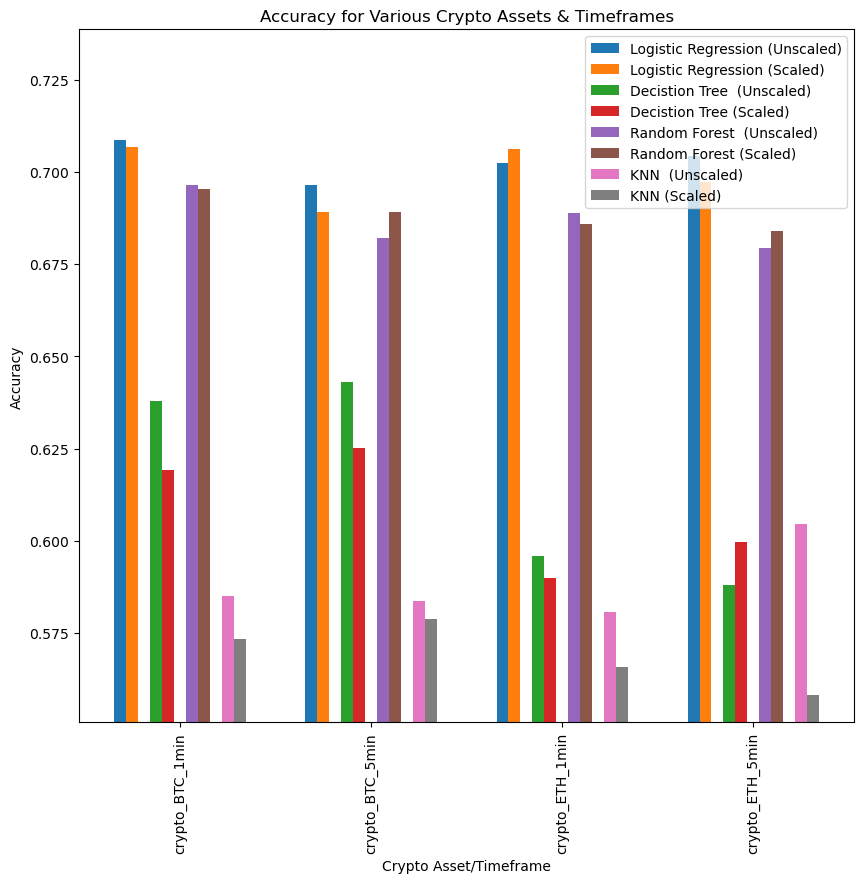

In [12]:
# Accuracy Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['Logistic Regression'])
dectree_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['Decision Tree'])
rndfor_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['Random Forest'])
knn_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['KNN'])

logreg_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['Logistic Regression'])
dectree_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['Decision Tree'])
rndfor_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['Random Forest'])
knn_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))

sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Accuracy-unscaled',' ')]) + .03
min_y_lim = min(supervised_learning_summary_df[('Accuracy-unscaled',' ')]) - .03
plt.ylim(min_y_lim, max_y_lim)

plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Asset/Timeframe")
plt.ylabel("Accuracy")
plt.title("Accuracy for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [13]:
# Precision (Value=+1) Comparison DataFrame 

precision_1_df = supervised_learning_summary_df[[('Precision-unscaled','1'),('Precision-scaled','1')]]
precision_1_df.columns = [['Precision-unscaled-1','Precision-scaled-1']]
precision_1_unstack_df = precision_1_df.unstack()

print("Precision/0 for Various Crypto Assets & Timeframes:")
display(precision_1_unstack_df) 

Precision/0 for Various Crypto Assets & Timeframes:


Precision-unscaled-1                                \
                       Decision Tree       KNN Logistic Regression   
crypto_BTC_1min             0.636680  0.577216            0.731920   
crypto_BTC_5min             0.653747  0.586902            0.716931   
crypto_ETH_1min             0.596136  0.577848            0.713508   
crypto_ETH_5min             0.587224  0.593407            0.699764   

                              Precision-scaled-1            \
                Random Forest      Decision Tree       KNN   
crypto_BTC_1min      0.696227           0.615611  0.565425   
crypto_BTC_5min      0.708791           0.633333  0.575058   
crypto_ETH_1min      0.677079           0.590607  0.564375   
crypto_ETH_5min      0.671296           0.596659  0.552036   

                                                   
                Logistic Regression Random Forest  
crypto_BTC_1min            0.722251      0.694336  
crypto_BTC_5min            0.700508      0.714674  
crypto_ETH_1min            0.716110      0.674286  
crypto_ETH_5min            0.689095      0.682692

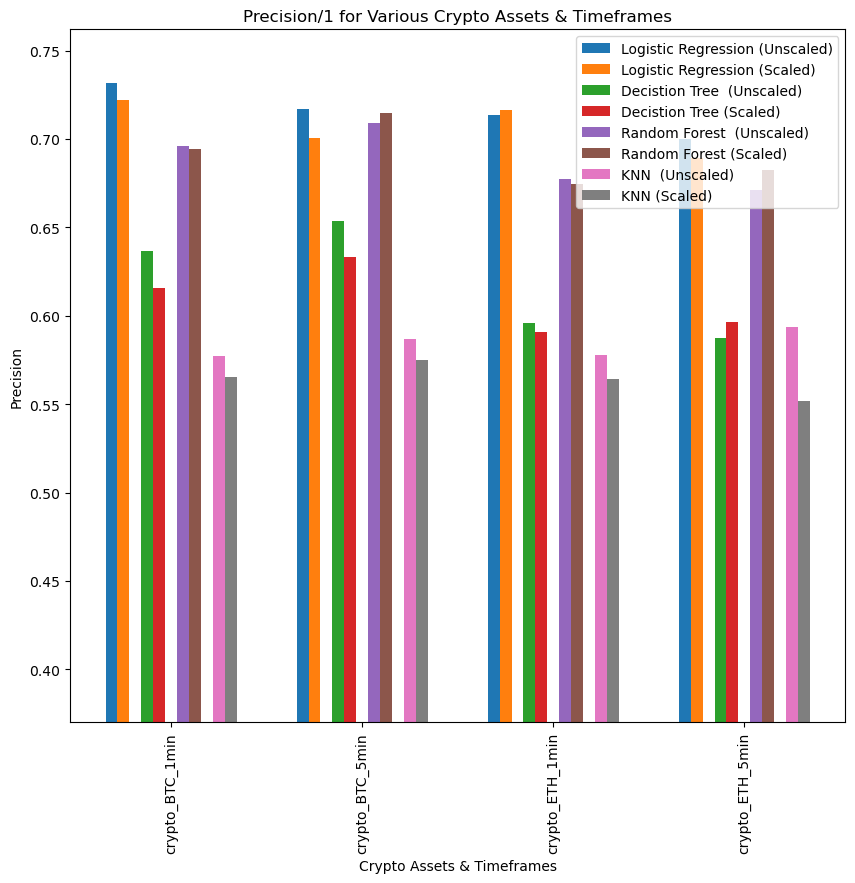

In [31]:
# Precision (Value=+1) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(precision_1_unstack_df['Precision-unscaled-1']['Logistic Regression'])
dectree_npa = np.array(precision_1_unstack_df['Precision-unscaled-1']['Decision Tree'])
rndfor_npa = np.array(precision_1_unstack_df['Precision-unscaled-1']['Random Forest'])
knn_npa = np.array(precision_1_unstack_df['Precision-unscaled-1']['KNN'])

logreg_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled-1']['Logistic Regression'])
dectree_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled-1']['Decision Tree'])
rndfor_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled-1']['Random Forest'])
knn_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled-1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Precision-unscaled','1')]) + .03
min_y_lim = min (0.4, min(supervised_learning_summary_df[('Precision-unscaled','1')])) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("Precision")
plt.title("Precision/1 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [29]:
# Precision (Value=0) Comparison DataFrame 

precision_neg1_df = supervised_learning_summary_df[[('Precision-unscaled','0'),('Precision-scaled','0')]]
precision_neg1_df.columns = [['Precision-unscaled-0','Precision-scaled-0']]
precision_neg1_unstack_df = precision_neg1_df.unstack()

print("Precision/0 for Various Crypto Assets & Timeframes:")
display(precision_neg1_unstack_df) 


Precision/0 for Various Crypto Assets & Timeframes:


Precision-unscaled-0                                \
                       Decision Tree       KNN Logistic Regression   
crypto_BTC_1min             0.638730  0.592389            0.690984   
crypto_BTC_5min             0.633772  0.580717            0.679570   
crypto_ETH_1min             0.595735  0.583815            0.692205   
crypto_ETH_5min             0.588506  0.617571            0.708831   

                              Precision-scaled-0            \
                Random Forest      Decision Tree       KNN   
crypto_BTC_1min      0.696604           0.622658  0.580778   
crypto_BTC_5min      0.661795           0.618102  0.582927   
crypto_ETH_1min      0.701894           0.589129  0.567235   
crypto_ETH_5min      0.687805           0.602837  0.565000   

                                                   
                Logistic Regression Random Forest  
crypto_BTC_1min            0.694281      0.696100  
crypto_BTC_5min            0.679287      0.669474  
crypto_ETH_1min            0.697280      0.699102  
crypto_ETH_5min            0.705596      0.685446

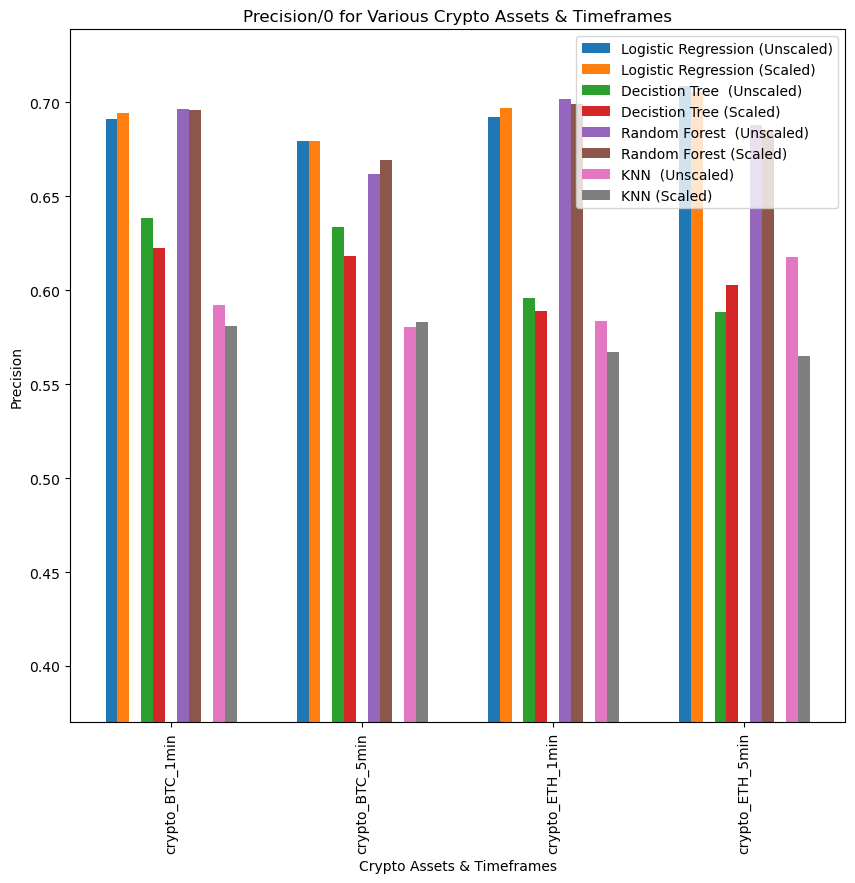

In [33]:
# Precision (Value=0) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(precision_neg1_unstack_df['Precision-unscaled-0']['Logistic Regression'])
dectree_npa = np.array(precision_neg1_unstack_df['Precision-unscaled-0']['Decision Tree'])
rndfor_npa = np.array(precision_neg1_unstack_df['Precision-unscaled-0']['Random Forest'])
knn_npa = np.array(precision_neg1_unstack_df['Precision-unscaled-0']['KNN'])

logreg_scaled_npa = np.array(precision_neg1_unstack_df['Precision-scaled-0']['Logistic Regression'])
dectree_scaled_npa = np.array(precision_neg1_unstack_df['Precision-scaled-0']['Decision Tree'])
rndfor_scaled_npa = np.array(precision_neg1_unstack_df['Precision-scaled-0']['Random Forest'])
knn_scaled_npa = np.array(precision_neg1_unstack_df['Precision-scaled-0']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Precision-unscaled','0')]) + .03
min_y_lim = min (0.4, min(supervised_learning_summary_df[('Precision-unscaled','0')])) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("Precision")
plt.title("Precision/0 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [17]:
# Recall (Value=+1) Comparison DataFrame 

recall_1_df = supervised_learning_summary_df[[('Recall-unscaled','1'),('Recall-scaled','1')]]
recall_1_df.columns = [['Recall-unscaled-1','Recall-scaled+1']]
recall_1_unstack_df = recall_1_df.unstack()

print("recall/1 for Various Crypto Assets & Timeframes:")
display(recall_1_unstack_df) 

recall/1 for Various Crypto Assets & Timeframes:


Recall-unscaled-1                                              \
                    Decision Tree       KNN Logistic Regression Random Forest   
crypto_BTC_1min          0.610000  0.576667            0.640952      0.676667   
crypto_BTC_5min          0.602381  0.554762            0.645238      0.614286   
crypto_ETH_1min          0.591951  0.595695            0.674778      0.720168   
crypto_ETH_5min          0.571770  0.645933            0.708134      0.693780   

                Recall-scaled+1                                              
                  Decision Tree       KNN Logistic Regression Random Forest  
crypto_BTC_1min        0.597143  0.563810            0.653810      0.677143  
crypto_BTC_5min        0.588095  0.592857            0.657143      0.626190  
crypto_ETH_1min        0.582592  0.572298            0.682265      0.717829  
crypto_ETH_5min        0.598086  0.583732            0.710526      0.679426

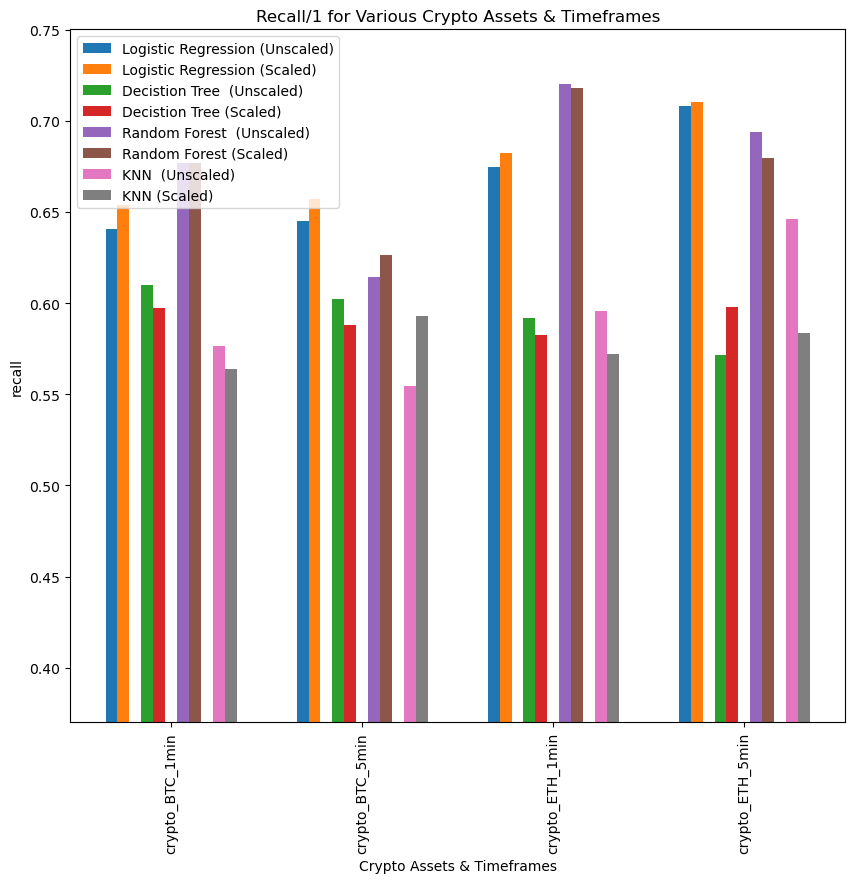

In [34]:
# Recall (Value=1) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(recall_1_unstack_df['Recall-unscaled-1']['Logistic Regression'])
dectree_npa = np.array(recall_1_unstack_df['Recall-unscaled-1']['Decision Tree'])
rndfor_npa = np.array(recall_1_unstack_df['Recall-unscaled-1']['Random Forest'])
knn_npa = np.array(recall_1_unstack_df['Recall-unscaled-1']['KNN'])

logreg_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled+1']['Logistic Regression'])
dectree_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled+1']['Decision Tree'])
rndfor_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled+1']['Random Forest'])
knn_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled+1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Recall-unscaled','1')]) + .03
min_y_lim = min (0.4, min(supervised_learning_summary_df[('Recall-unscaled','1')])) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("recall")
plt.title("Recall/1 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [19]:
# Recall (Value=0) Comparison DataFrame 

recall_neg1_df = supervised_learning_summary_df[[('Recall-unscaled','0'),('Recall-scaled','0')]]
recall_neg1_df.columns = [['Recall-unscaled-0','Recall-scaled-0']]
recall_neg1_unstack_df = recall_neg1_df.unstack()

print("recall/0 for Various Crypto Assets & Timeframes:")
display(recall_neg1_unstack_df) 

recall/0 for Various Crypto Assets & Timeframes:


Recall-unscaled-0                                              \
                    Decision Tree       KNN Logistic Regression Random Forest   
crypto_BTC_1min          0.664525  0.592933            0.773749      0.715466   
crypto_BTC_5min          0.683215  0.612293            0.747045      0.749409   
crypto_ETH_1min          0.599907  0.565826            0.729692      0.657330   
crypto_ETH_5min          0.603774  0.563679            0.700472      0.665094   

                Recall-scaled-0                                              
                  Decision Tree       KNN Logistic Regression Random Forest  
crypto_BTC_1min        0.640661  0.582377            0.757687      0.712712  
crypto_BTC_5min        0.661939  0.565012            0.721040      0.751773  
crypto_ETH_1min        0.597106  0.559290            0.730159      0.654062  
crypto_ETH_5min        0.601415  0.533019            0.683962      0.688679

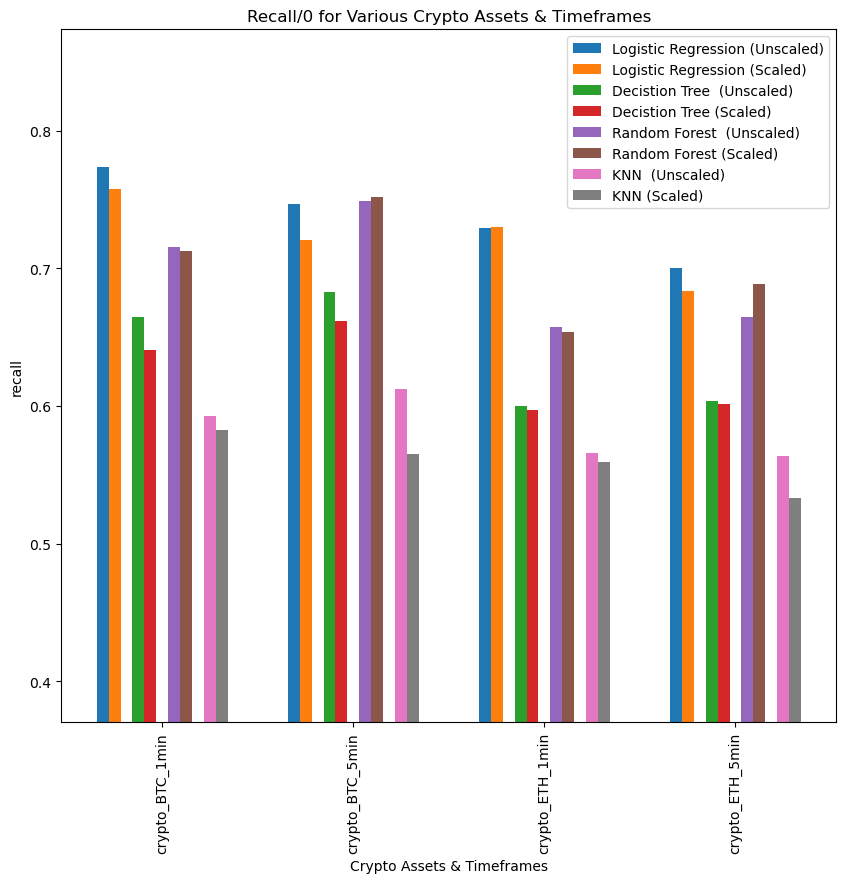

In [35]:
# Recall (Value=0) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(recall_neg1_unstack_df['Recall-unscaled-0']['Logistic Regression'])
dectree_npa = np.array(recall_neg1_unstack_df['Recall-unscaled-0']['Decision Tree'])
rndfor_npa = np.array(recall_neg1_unstack_df['Recall-unscaled-0']['Random Forest'])
knn_npa = np.array(recall_neg1_unstack_df['Recall-unscaled-0']['KNN'])

logreg_scaled_npa = np.array(recall_neg1_unstack_df['Recall-scaled-0']['Logistic Regression'])
dectree_scaled_npa = np.array(recall_neg1_unstack_df['Recall-scaled-0']['Decision Tree'])
rndfor_scaled_npa = np.array(recall_neg1_unstack_df['Recall-scaled-0']['Random Forest'])
knn_scaled_npa = np.array(recall_neg1_unstack_df['Recall-scaled-0']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Recall-unscaled','0')]) + .1
min_y_lim = min (0.4, min(supervised_learning_summary_df[('Recall-unscaled','0')])) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("recall")
plt.title("Recall/0 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [21]:
# F1-Score (Value=1) Comparison DataFrame 

f1_score_1_df = supervised_learning_summary_df[[('F1-Score-unscaled','1'),('F1-Score-scaled','1')]]
f1_score_1_df.columns = [['F1-Score-unscaled-1','F1-Score-scaled-1']]
f1_score_1_unstack_df = f1_score_1_df.unstack()

print("f1_score/1 for Various Crypto Assets & Timeframes:")
display(f1_score_1_unstack_df) 


f1_score/1 for Various Crypto Assets & Timeframes:


F1-Score-unscaled-1                                \
                      Decision Tree       KNN Logistic Regression   
crypto_BTC_1min            0.623054  0.576941            0.683422   
crypto_BTC_5min            0.627014  0.570379            0.679198   
crypto_ETH_1min            0.594036  0.586636            0.693603   
crypto_ETH_5min            0.579394  0.618557            0.703924   

                              F1-Score-scaled-1                                \
                Random Forest     Decision Tree       KNN Logistic Regression   
crypto_BTC_1min      0.686308          0.606236  0.564616            0.686328   
crypto_BTC_5min      0.658163          0.609877  0.583822            0.678133   
crypto_ETH_1min      0.697959          0.586572  0.568309            0.698778   
crypto_ETH_5min      0.682353          0.597372  0.567442            0.699647   

                               
                Random Forest  
crypto_BTC_1min      0.685632  
crypto_BTC_5min      0.667513  
crypto_ETH_1min      0.695376  
crypto_ETH_5min      0.681055

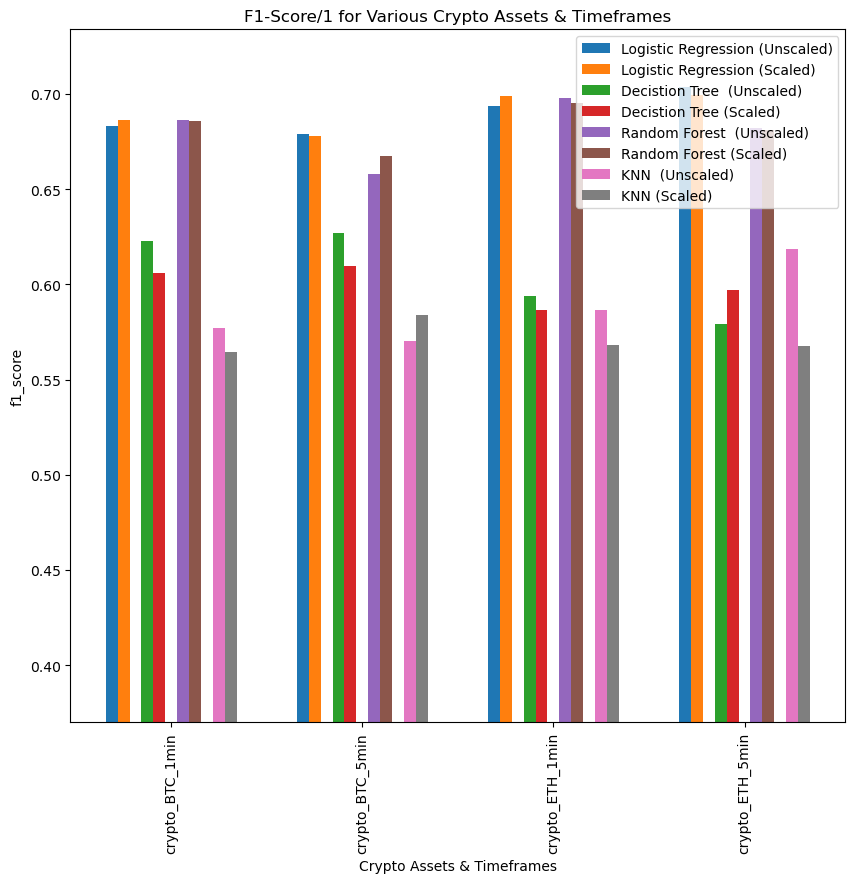

In [36]:
# F1-Score (Value=1) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled-1']['Logistic Regression'])
dectree_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled-1']['Decision Tree'])
rndfor_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled-1']['Random Forest'])
knn_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled-1']['KNN'])

logreg_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled-1']['Logistic Regression'])
dectree_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled-1']['Decision Tree'])
rndfor_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled-1']['Random Forest'])
knn_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled-1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('F1-Score-unscaled','1')]) + .03
min_y_lim = min (0.4, min(supervised_learning_summary_df[('F1-Score-unscaled','1')])) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("f1_score")
plt.title("F1-Score/1 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [23]:
# F1-Score (Value=0) Comparison DataFrame 

f1_score_neg1_df = supervised_learning_summary_df[[('F1-Score-unscaled','0'),('F1-Score-scaled','0')]]
f1_score_neg1_df.columns = [['F1-Score-unscaled-0','F1-Score-scaled-0']]
f1_score_neg1_unstack_df = f1_score_neg1_df.unstack()

print("f1_score/0 for Various Crypto Assets & Timeframes:")
display(f1_score_neg1_unstack_df) 

f1_score/0 for Various Crypto Assets & Timeframes:


F1-Score-unscaled-0                                \
                      Decision Tree       KNN Logistic Regression   
crypto_BTC_1min            0.651372  0.592661            0.730028   
crypto_BTC_5min            0.657565  0.596087            0.711712   
crypto_ETH_1min            0.597813  0.574680            0.710455   
crypto_ETH_5min            0.596042  0.589396            0.704626   

                              F1-Score-scaled-0                                \
                Random Forest     Decision Tree       KNN Logistic Regression   
crypto_BTC_1min      0.705909          0.631531  0.581577            0.724600   
crypto_BTC_5min      0.702882          0.639269  0.573830            0.699541   
crypto_ETH_1min      0.678881          0.593091  0.563235            0.713341   
crypto_ETH_5min      0.676259          0.602125  0.548544            0.694611   

                               
                Random Forest  
crypto_BTC_1min      0.704308  
crypto_BTC_5min      0.708241  
crypto_ETH_1min      0.675832  
crypto_ETH_5min      0.687059

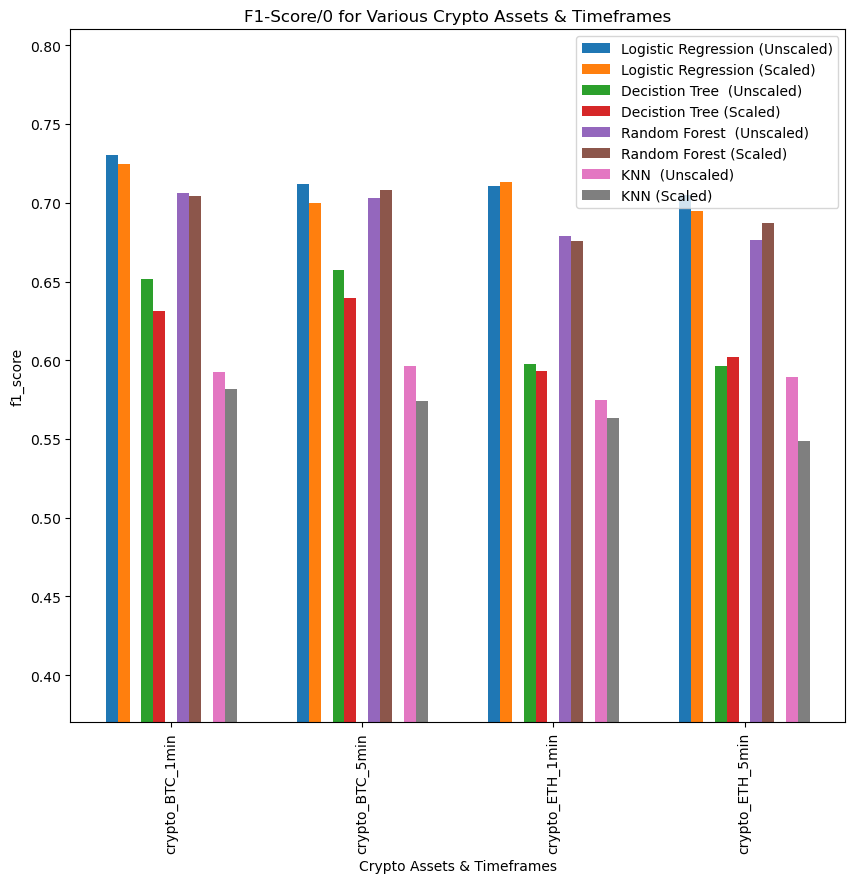

In [37]:

# F1-Score (Value=0) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(f1_score_neg1_unstack_df['F1-Score-unscaled-0']['Logistic Regression'])
dectree_npa = np.array(f1_score_neg1_unstack_df['F1-Score-unscaled-0']['Decision Tree'])
rndfor_npa = np.array(f1_score_neg1_unstack_df['F1-Score-unscaled-0']['Random Forest'])
knn_npa = np.array(f1_score_neg1_unstack_df['F1-Score-unscaled-0']['KNN'])

logreg_scaled_npa = np.array(f1_score_neg1_unstack_df['F1-Score-scaled-0']['Logistic Regression'])
dectree_scaled_npa = np.array(f1_score_neg1_unstack_df['F1-Score-scaled-0']['Decision Tree'])
rndfor_scaled_npa = np.array(f1_score_neg1_unstack_df['F1-Score-scaled-0']['Random Forest'])
knn_scaled_npa = np.array(f1_score_neg1_unstack_df['F1-Score-scaled-0']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('F1-Score-unscaled','0')]) + .08
min_y_lim = min (0.4, min(supervised_learning_summary_df[('F1-Score-unscaled','0')])) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("f1_score")
plt.title("F1-Score/0 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()